In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

In [2]:
boston=load_boston()
boston_df= pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['Price']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [6]:
X=boston_df.drop(['Price'],axis=1)
y=boston_df.Price

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [21]:
dt_regressor = DecisionTreeRegressor(max_depth=7)   #max depth can be vvaried for better results
dt_regressor.fit(X_train,y_train)

score=dt_regressor.score(X_train,y_train)
print('R-Squared Train= ',score)

score1=dt_regressor.score(X_test,y_test)
print('R-Squared Test= ',score1)


y_pred=dt_regressor.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
print('mse= ',mse)
print('Rmse= ',mse**(1/2))

R-Squared Train=  0.9721142385064595
R-Squared Test=  0.835015481484054
mse=  15.121571424316542
Rmse=  3.8886464771584137


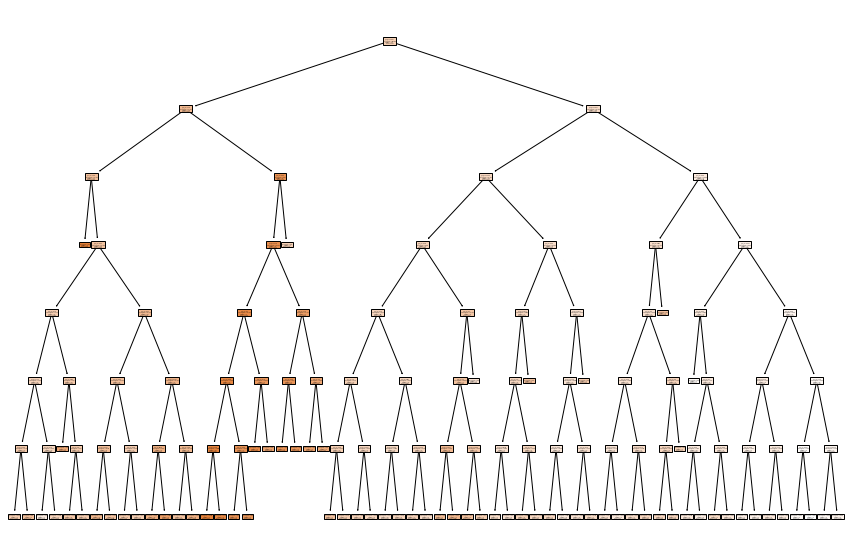

In [22]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_regressor,filled=True,class_names=True)
plt.show()